<a href="https://colab.research.google.com/github/Joab-S/SimulacaoEstocasticaUFC/blob/main/T5_SimEstoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import random as r
import simpy as sp
import numpy as np
import matplotlib.pyplot as mp
import itertools

Q1) Construção de Produtos

Q2) Restaurante

Q3) Supermercado

A saída de streaming foi truncada nas últimas 5000 linhas.
Um novo cliente de id "43" chegou no turno de 16h - 00h, às 21h do 2º dia do mês. Um total de 34 clientes chegaram nesse turno. Tempo de simulação em 45.

Um novo cliente de id "44" chegou no turno de 16h - 00h, às 21h do 2º dia do mês. Um total de 35 clientes chegaram nesse turno. Tempo de simulação em 45.

Um novo cliente de id "45" chegou no turno de 16h - 00h, às 21h do 2º dia do mês. Um total de 36 clientes chegaram nesse turno. Tempo de simulação em 45.

Um novo cliente de id "46" chegou no turno de 16h - 00h, às 21h do 2º dia do mês. Um total de 37 clientes chegaram nesse turno. Tempo de simulação em 45.

COMPRA: O cliente "46" passou 16 minutos comprando entre 16h - 00h.

ATENDIMENTO: O cliente "46" passou 1 minutos em atendimento entre 16h - 00h.

O cliente "46" saiu do sistema depois de 17 minutos. Um total de 36 clientes saíram nesse turno. Tempo de simulação em 45.28353306177394.

COMPRA: O cliente "45" passou 19 mi

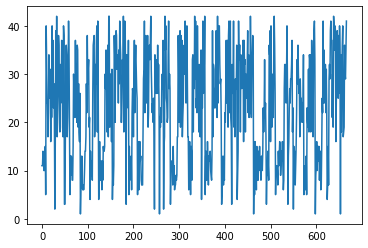

In [70]:
# SIMULAÇÃO EM HORAS
BANCO_DE_CLIENTES = {}
TOTAL_CLIENTES_NO_MERCADO = []

class Client():
  newid = itertools.count().__next__
  HORA_CHEGADA: float = None;
  DIA_DA_COMPRA: float = None;
  TEMPO_DE_COMPRA: float = None;
  TEMPO_DE_ATENDIMENTO: float = None;
  TEMPO_NO_SISTEMA: float = None;
  FOI_ATENDIDO: bool = False

  def __init__(self, hC, dC):
    self.id = Client.newid()
    self.HORA_CHEGADA = hC;
    self.DIA_DA_COMPRA = dC;

  def getID(self):
    return self.id;

  def setTempoDeCompra(self, t):
    self.TEMPO_DE_COMPRA = t;

  def getTempoDeCompra(self):
    return self.TEMPO_DE_COMPRA

  def getTempoNoSistema(self):
    self.TEMPO_NO_SISTEMA = self.getTempoDeCompra() + self.getTempoAtendimento()
    return self.TEMPO_NO_SISTEMA

  def getHoraChegada(self):
    return self.HORA_CHEGADA

  def setAtendido(self, t):
    self.FOI_ATENDIDO = not self.FOI_ATENDIDO
    self.TEMPO_DE_ATENDIMENTO = t

  def getTempoAtendimento(self):
    return self.TEMPO_DE_ATENDIMENTO

  def foiAtendido(self):
    return self.FOI_ATENDIDO

  def str(self):
    return {
      'id': self.id,
      'HORA_CHEGADA': self.HORA_CHEGADA,
      'DIA_DA_COMPRA': self.DIA_DA_COMPRA,
      'TEMPO_DE_COMPRA': self.TEMPO_DE_COMPRA,
      'TEMPO_DE_ATENDIMENTO': self.TEMPO_DE_ATENDIMENTO,
      'TEMPO_NO_SISTEMA': self.TEMPO_NO_SISTEMA,
      'FOI_ATENDIDO': self.FOI_ATENDIDO
    }

class Turno():
  TURNO: str;
  TAXA_CHEGADA: float;
  CAIXA: int;
  MIN_TEMPO_COMPRA: float;
  MAX_TEMPO_COMPRA: float;
  N_CLIENTES_C = 0
  N_CLIENTES_S = 0

  def __init__(self, turno, taxa_c, caixa, min_compra, max_compra):
    self.TURNO = turno;
    self.TAXA_CHEGADA = taxa_c;
    self.CAIXA = caixa;
    self.MIN_TEMPO_COMPRA = min_compra;
    self.MAX_TEMPO_COMPRA = max_compra;

  def setN_clientes_C(self, n):
    self.N_CLIENTES_C = n;

  def setN_clientes_S(self, n):
    self.N_CLIENTES_S = n;

  def getN_clientes_C(self):
    return self.N_CLIENTES_C;

  def getN_clientes_S(self):
    return self.N_CLIENTES_S;

TURNO_1  = Turno ("08h - 16h", 16.8, 2,   5, 15)
TURNO_2  = Turno ("16h - 00h", 24.0, 4,  15, 40)
TURNO_3  = Turno ("00h - 08h",  0.7, 1,   1,  5)
LIMITE = 720                                          # 30 dias em horas
UNIDADE_TEMPO = 24

def initVar():
  global TURNO_1, TURNO_2, TURNO_3, LIMITE

  TURNO_1  = Turno ("08h - 16h", 16.8, 2,   5, 15)
  TURNO_2  = Turno ("16h - 00h", 24.0, 4,  15, 40)
  TURNO_3  = Turno ("00h - 08h",  0.7, 1,   1,  5)
  LIMITE = 720                                        # 760 - horas   |   43200 - minutos
  UNIDADE_TEMPO = 24                                  # 24  - horas   |   1440  - minutos


def getDia(env):
  """Retorna o dia da simulação"""

  global LIMITE, UNIDADE_TEMPO
  total_dia = LIMITE/UNIDADE_TEMPO

  dias_restantes = (LIMITE - env.now)/UNIDADE_TEMPO
  dia = total_dia - dias_restantes
  
  return dia


def getTurno(env) -> Turno:
  global TURNO_1, TURNO_2, TURNO_3, UNIDADE_TEMPO
  
  DIA = getDia(env)
  _8h = UNIDADE_TEMPO/3
  
  if (env.now <= (_8h + 24*int(DIA))):
    return TURNO_3

  if (env.now > (_8h + 24*int(DIA)) and env.now <= (_8h*2 + 24*int(DIA))):
    return TURNO_1

  if (env.now > (_8h*2 + 24*int(DIA)) and env.now <= (_8h*3 + 24*int(DIA))):
    return TURNO_2


def chegada(env, turno: Turno):
  global BANCO_DE_CLIENTES

  while True:
    yield env.timeout(np.random.poisson(10/(turno.TAXA_CHEGADA)))

    turno = getTurno(env)
    turno.setN_clientes_C(turno.getN_clientes_C() + 1)
    dia = int(getDia(env))
    hora_atual = env.now - UNIDADE_TEMPO*dia
    client = Client(hora_atual, dia+1)
    BANCO_DE_CLIENTES[client.getID()] = client
    
    print(f'Um novo cliente de id "{client.getID()}" chegou no turno de {turno.TURNO}, às {hora_atual}h do {dia+1}º dia do mês. Um total de {turno.getN_clientes_C()} clientes chegaram nesse turno. Tempo de simulação em {env.now}.\n')
    env.process(compra(env, client.getID(), turno))
  

def compra(env, clientID, turno: Turno):
  global TOTAL_CLIENTES_NO_MERCADO, BANCO_DE_CLIENTES

  tCompra = np.random.uniform(turno.MIN_TEMPO_COMPRA/60, turno.MAX_TEMPO_COMPRA/60)
  yield env.timeout(tCompra)

  cliente = BANCO_DE_CLIENTES[clientID]
  cliente.setTempoDeCompra(tCompra)
  TOTAL_CLIENTES_NO_MERCADO.append(cliente.str())

  print(f'COMPRA: O cliente "{cliente.getID()}" passou %.0f minutos comprando entre {turno.TURNO}.\n' %(tCompra*60))
  cliente.setTempoDeCompra(tCompra)


  if (len(TOTAL_CLIENTES_NO_MERCADO) == 1):
    env.process(atendimento(env))


def proxClienteAtendimento() -> Client:
  global TOTAL_CLIENTES_NO_MERCADO, BANCO_DE_CLIENTES

  clienteID = min(TOTAL_CLIENTES_NO_MERCADO, key=lambda d : d['TEMPO_DE_COMPRA'])['id']
  cliente = BANCO_DE_CLIENTES[clienteID]

  return cliente


def atendimento(env):
  global TOTAL_CLIENTES_NO_MERCADO

  while (len(TOTAL_CLIENTES_NO_MERCADO) > 0):
    cliente = proxClienteAtendimento()

    turno = getTurno(env)
    turno.setN_clientes_S(turno.getN_clientes_S() + 1)
    tAtendimento = np.random.triangular(0.2*cliente.TEMPO_DE_COMPRA, 0.25*cliente.TEMPO_DE_COMPRA, 0.3*cliente.TEMPO_DE_COMPRA)/turno.CAIXA
    yield env.timeout(tAtendimento)
    
    print(f'ATENDIMENTO: O cliente "{cliente.getID()}" passou %.0f minutos em atendimento entre {turno.TURNO}.\n' %(tAtendimento*60))
    cliente.setAtendido(tAtendimento)
    horaSaida = cliente.getTempoNoSistema()
    print(f'O cliente "{cliente.getID()}" saiu do sistema depois de %.0f minutos. Um total de {turno.getN_clientes_S()} clientes saíram nesse turno. Tempo de simulação em {env.now}.\n' %int(horaSaida*60))

    del TOTAL_CLIENTES_NO_MERCADO[0] # LISTA JÁ ESTÁ SEMPRE ORDENADA POR MENOR TEMPO DE ATENDIMENTO


def systemSim():
  global LIMITE

  initVar()
  env = sp.Environment()
  turno = getTurno(env)
  env.process(chegada(env, turno))
  env.run(until=LIMITE)

  print("\nFim da execução!\n")

systemSim()

LISTA_TEMPO_NO_SISTEMA = []
for i in range(len(BANCO_DE_CLIENTES)):
  LISTA_TEMPO_NO_SISTEMA.append(int(BANCO_DE_CLIENTES[i].getTempoNoSistema()*60))

print(f'Foram atendidos um total de %d clientes no período de %d dias' %(len(LISTA_TEMPO_NO_SISTEMA), (LIMITE/UNIDADE_TEMPO)))
print(f'Tempo Médio no Sistema %0.f (em minutos) e Variância do Tempo Médio no Sistema %0.f (em minutos)' %(np.mean(LISTA_TEMPO_NO_SISTEMA), np.var(LISTA_TEMPO_NO_SISTEMA)))
print(f'No turno de  0h às  8h chegaram %d clientes e foram atendidos %d.' %(TURNO_3.getN_clientes_C(), TURNO_3.getN_clientes_S()))
print(f'No turno de  8h às 16h chegaram %d clientes e foram atendidos %d.' %(TURNO_1.getN_clientes_C(), TURNO_1.getN_clientes_S()))
print(f'No turno de 16h às  0h chegaram %d clientes e foram atendidos %d.' %(TURNO_2.getN_clientes_C(), TURNO_2.getN_clientes_S()))

mp.plot(LISTA_TEMPO_NO_SISTEMA, label="Tempo de espera médio")